In [7]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#import seaborn as sns

import seaborn as sns
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

In [8]:
data = pd.read_csv('datasets/events.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data['person'].describe()

count      1011288
unique       27624
top       71492f2b
freq          2771
Name: person, dtype: object

# Personas por pais.

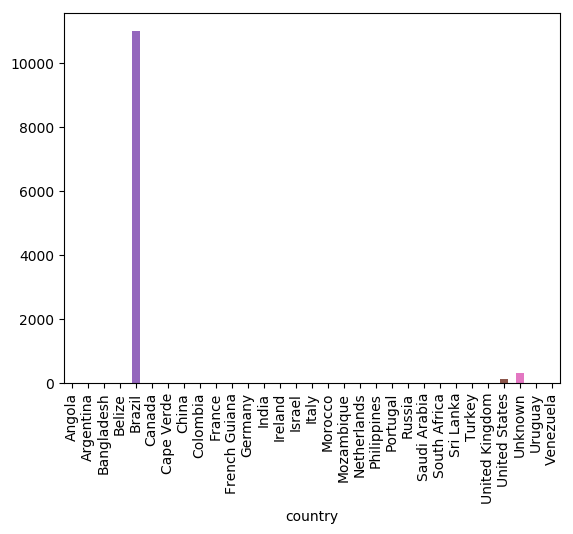

In [11]:
data.drop_duplicates(subset='person', inplace=False).groupby("country")['person'].count().plot(kind='bar')

# Personas por pais
### Excluyendo a brasil porque son amplia mayoria.

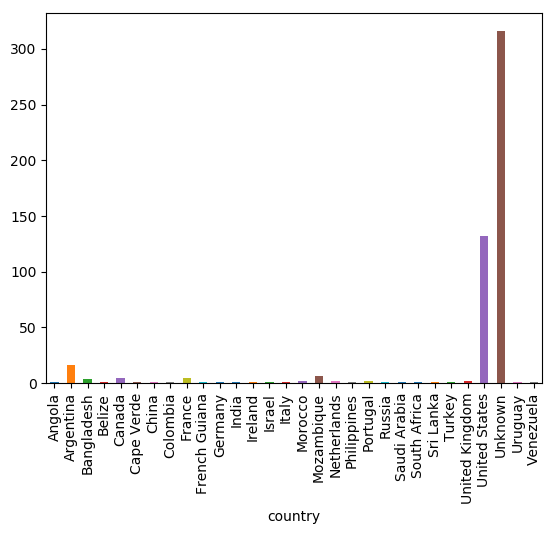

In [12]:
data[data['country'] != 'Brazil'].drop_duplicates(subset='person', inplace=False).groupby("country")['person'].count().plot(kind='bar')

# Analisis de lo obtenido.
### Es claro que brazil es el principal consumidor de esta pagina, tambien se observan visitas/comras de paises sin definir y de estados unidos, el resto de los paises parecen no tener peso en este analisis.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

# Analisis de chanel vs horario
### Suponemos que hay una relacion entre el tipo de contratacion y el horario en que se consume.


#### Pasamos la fecha a hora.

In [14]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'] = data['timestamp'].dt.hour
data.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,23,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,23,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


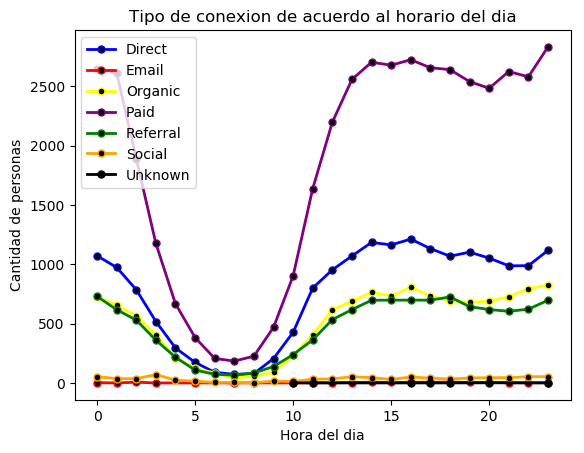

In [15]:
#puedo contar 'event' porque es una columna que esta completa.
graph = data.groupby(['channel','timestamp'])['event'].count()
graph = graph.to_frame()
graph.reset_index(inplace=True)

#-------ACA ARRANCA EL GRAFICO------

plt.xlabel('Hora del dia', fontdict=None, labelpad=None)
plt.ylabel('Cantidad de personas', fontdict=None, labelpad=None)
plt.title('Tipo de conexion de acuerdo al horario del dia')


graph1 = graph[graph['channel']=='Direct']
graph1.rename(columns={'event':'Direct'},inplace=True)

plt.plot( 'timestamp', 'Direct', data=graph1, marker='o', markerfacecolor='black', markersize=5, color='blue', linewidth=2)
graph2 = graph[graph['channel']=='Email']
graph2.rename(columns={'event':'Email'},inplace=True)

plt.plot( 'timestamp', 'Email', data=graph2, marker='o', markerfacecolor='black', markersize=5, color='red', linewidth=2)
graph3 = graph[graph['channel']=='Organic']
graph3.rename(columns={'event':'Organic'},inplace=True)

plt.plot( 'timestamp', 'Organic', data=graph3, marker='o', markerfacecolor='black', markersize=5, color='yellow', linewidth=2)
graph4 = graph[graph['channel']== 'Paid']
graph4.rename(columns={'event':'Paid'},inplace=True)

plt.plot( 'timestamp', 'Paid', data=graph4, marker='o', markerfacecolor='black', markersize=5, color='purple', linewidth=2)
graph5 = graph[graph['channel']== 'Referral']
graph5.rename(columns={'event':'Referral'},inplace=True)

plt.plot( 'timestamp', 'Referral', data=graph5, marker='o', markerfacecolor='black', markersize=5, color='green', linewidth=2)
graph6 = graph[graph['channel']== 'Social']
graph6.rename(columns={'event':'Social'},inplace=True)

plt.plot( 'timestamp', 'Social', data=graph6, marker='o', markerfacecolor='black', markersize=5, color='orange', linewidth=2)
graph7 = graph[graph['channel']== 'Unknown']
graph7.rename(columns={'event':'Unknown'},inplace=True)

plt.plot( 'timestamp', 'Unknown', data=graph7, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=2)
plt.legend()



In [16]:
data = 0 

In [17]:
data = pd.read_csv('datasets/events.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Veamos que sistema operativo usa la gente
### Tenemos la precaucion de borrar los usuarios duplicados para que no interfiera en la estadistica.

In [18]:
data.head(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
op = data.drop_duplicates(subset='person', inplace=False).groupby('operating_system_version')['person'].count()
op = op.to_frame()

In [20]:
op.reset_index(inplace = True)

In [21]:
def operating_system(x):
    x = x.split()
    return x[0]

In [22]:
op.operating_system_version = op.apply(lambda x: operating_system(x.operating_system_version),axis=1)

In [23]:
graph = op.groupby('operating_system_version')['person'].count()
graph = graph.to_frame()
graph

,person
operating_system_version,
Android,25
Chrome,5
Linux,1
Mac,18
Other,1
Tizen,1
Ubuntu,1
Windows,10
iOS,33


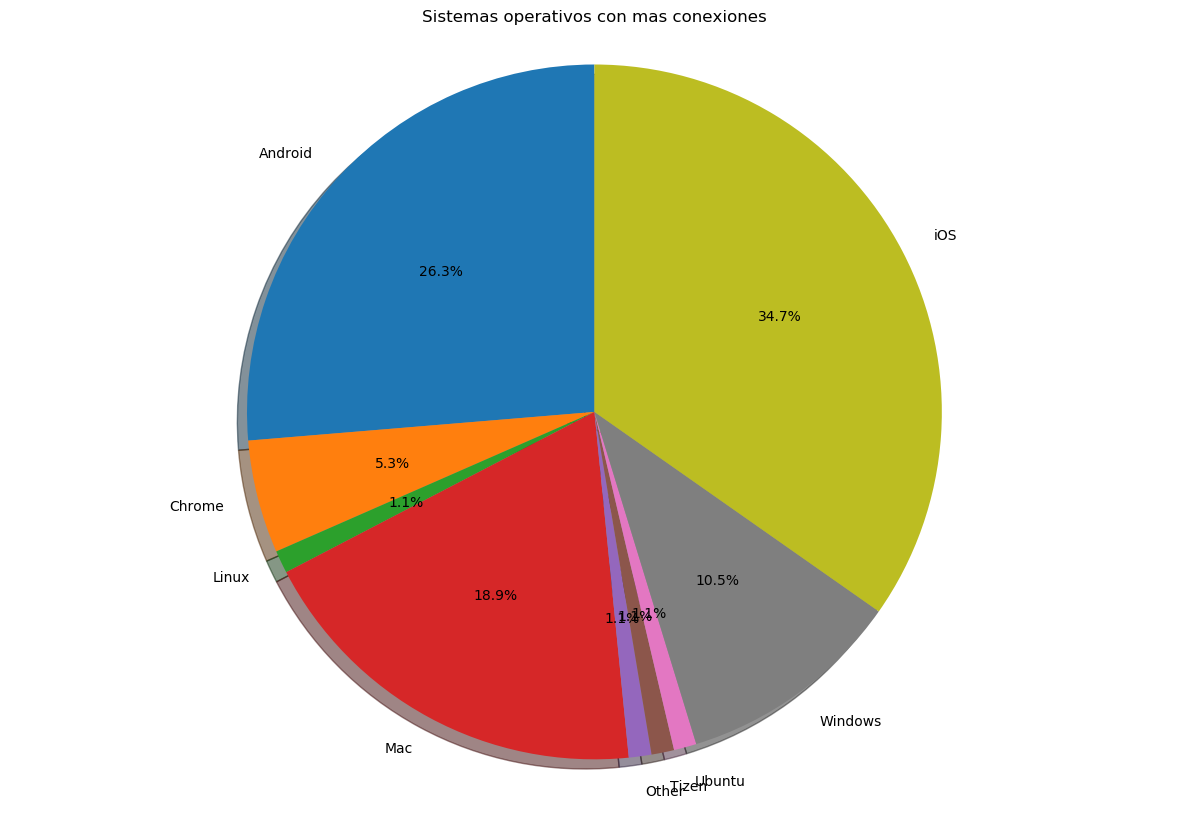

In [24]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Sistemas operativos con mas conexiones')
ax1.pie(graph['person'], labels=graph.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Al haber tan poca cantidad de informacion al respecto resulta dificil sacar conclusiones pero si esta muestra es representativa, podriamos decir que se utilizan mas los dispositivos moviles que los ordenadores de escritorio para consumir la pagina en cuestion.

In [25]:
graph = data.drop_duplicates(subset='person', inplace=False).dropna(subset=['campaign_source']).groupby('campaign_source')['person'].count().sort_values(ascending=False).to_frame()
graph.rename(columns={'person':'Usuarios'},inplace=True)

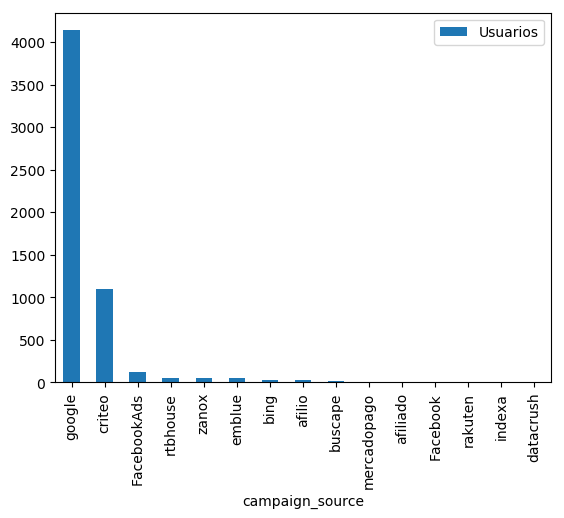

In [26]:
graph.plot(kind='bar')

In [27]:
data.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
graph = data.groupby(['person','event'])['timestamp'].count()

In [29]:
graph = graph.to_frame().reset_index()

In [30]:
graph = pd.get_dummies(graph, columns=['event'])
usuarios = graph['person']
graph.drop(['person'],inplace=True,axis=1)
graph = graph.apply(lambda x: x*x['timestamp'],axis=1)
graph.drop(['timestamp'],inplace=True,axis=1)
graph['person'] = usuarios

In [31]:
graph = graph.groupby('person').sum()
graph.head()

,event_ad campaign hit,event_brand listing,event_checkout,event_conversion,event_generic listing,event_lead,event_search engine hit,event_searched products,event_staticpage,event_viewed product,event_visited site
person,,,,,,,,,,,
0004b0a2,1,0,1,0,0,0,0,0,0,1,1
0006a21a,1,0,1,0,0,0,0,0,0,1,1
000a54b2,2,6,1,0,5,0,2,0,0,19,2
00184bf9,0,7,4,0,0,0,2,0,0,36,2
0019c395,2,0,1,0,0,0,2,0,0,2,1


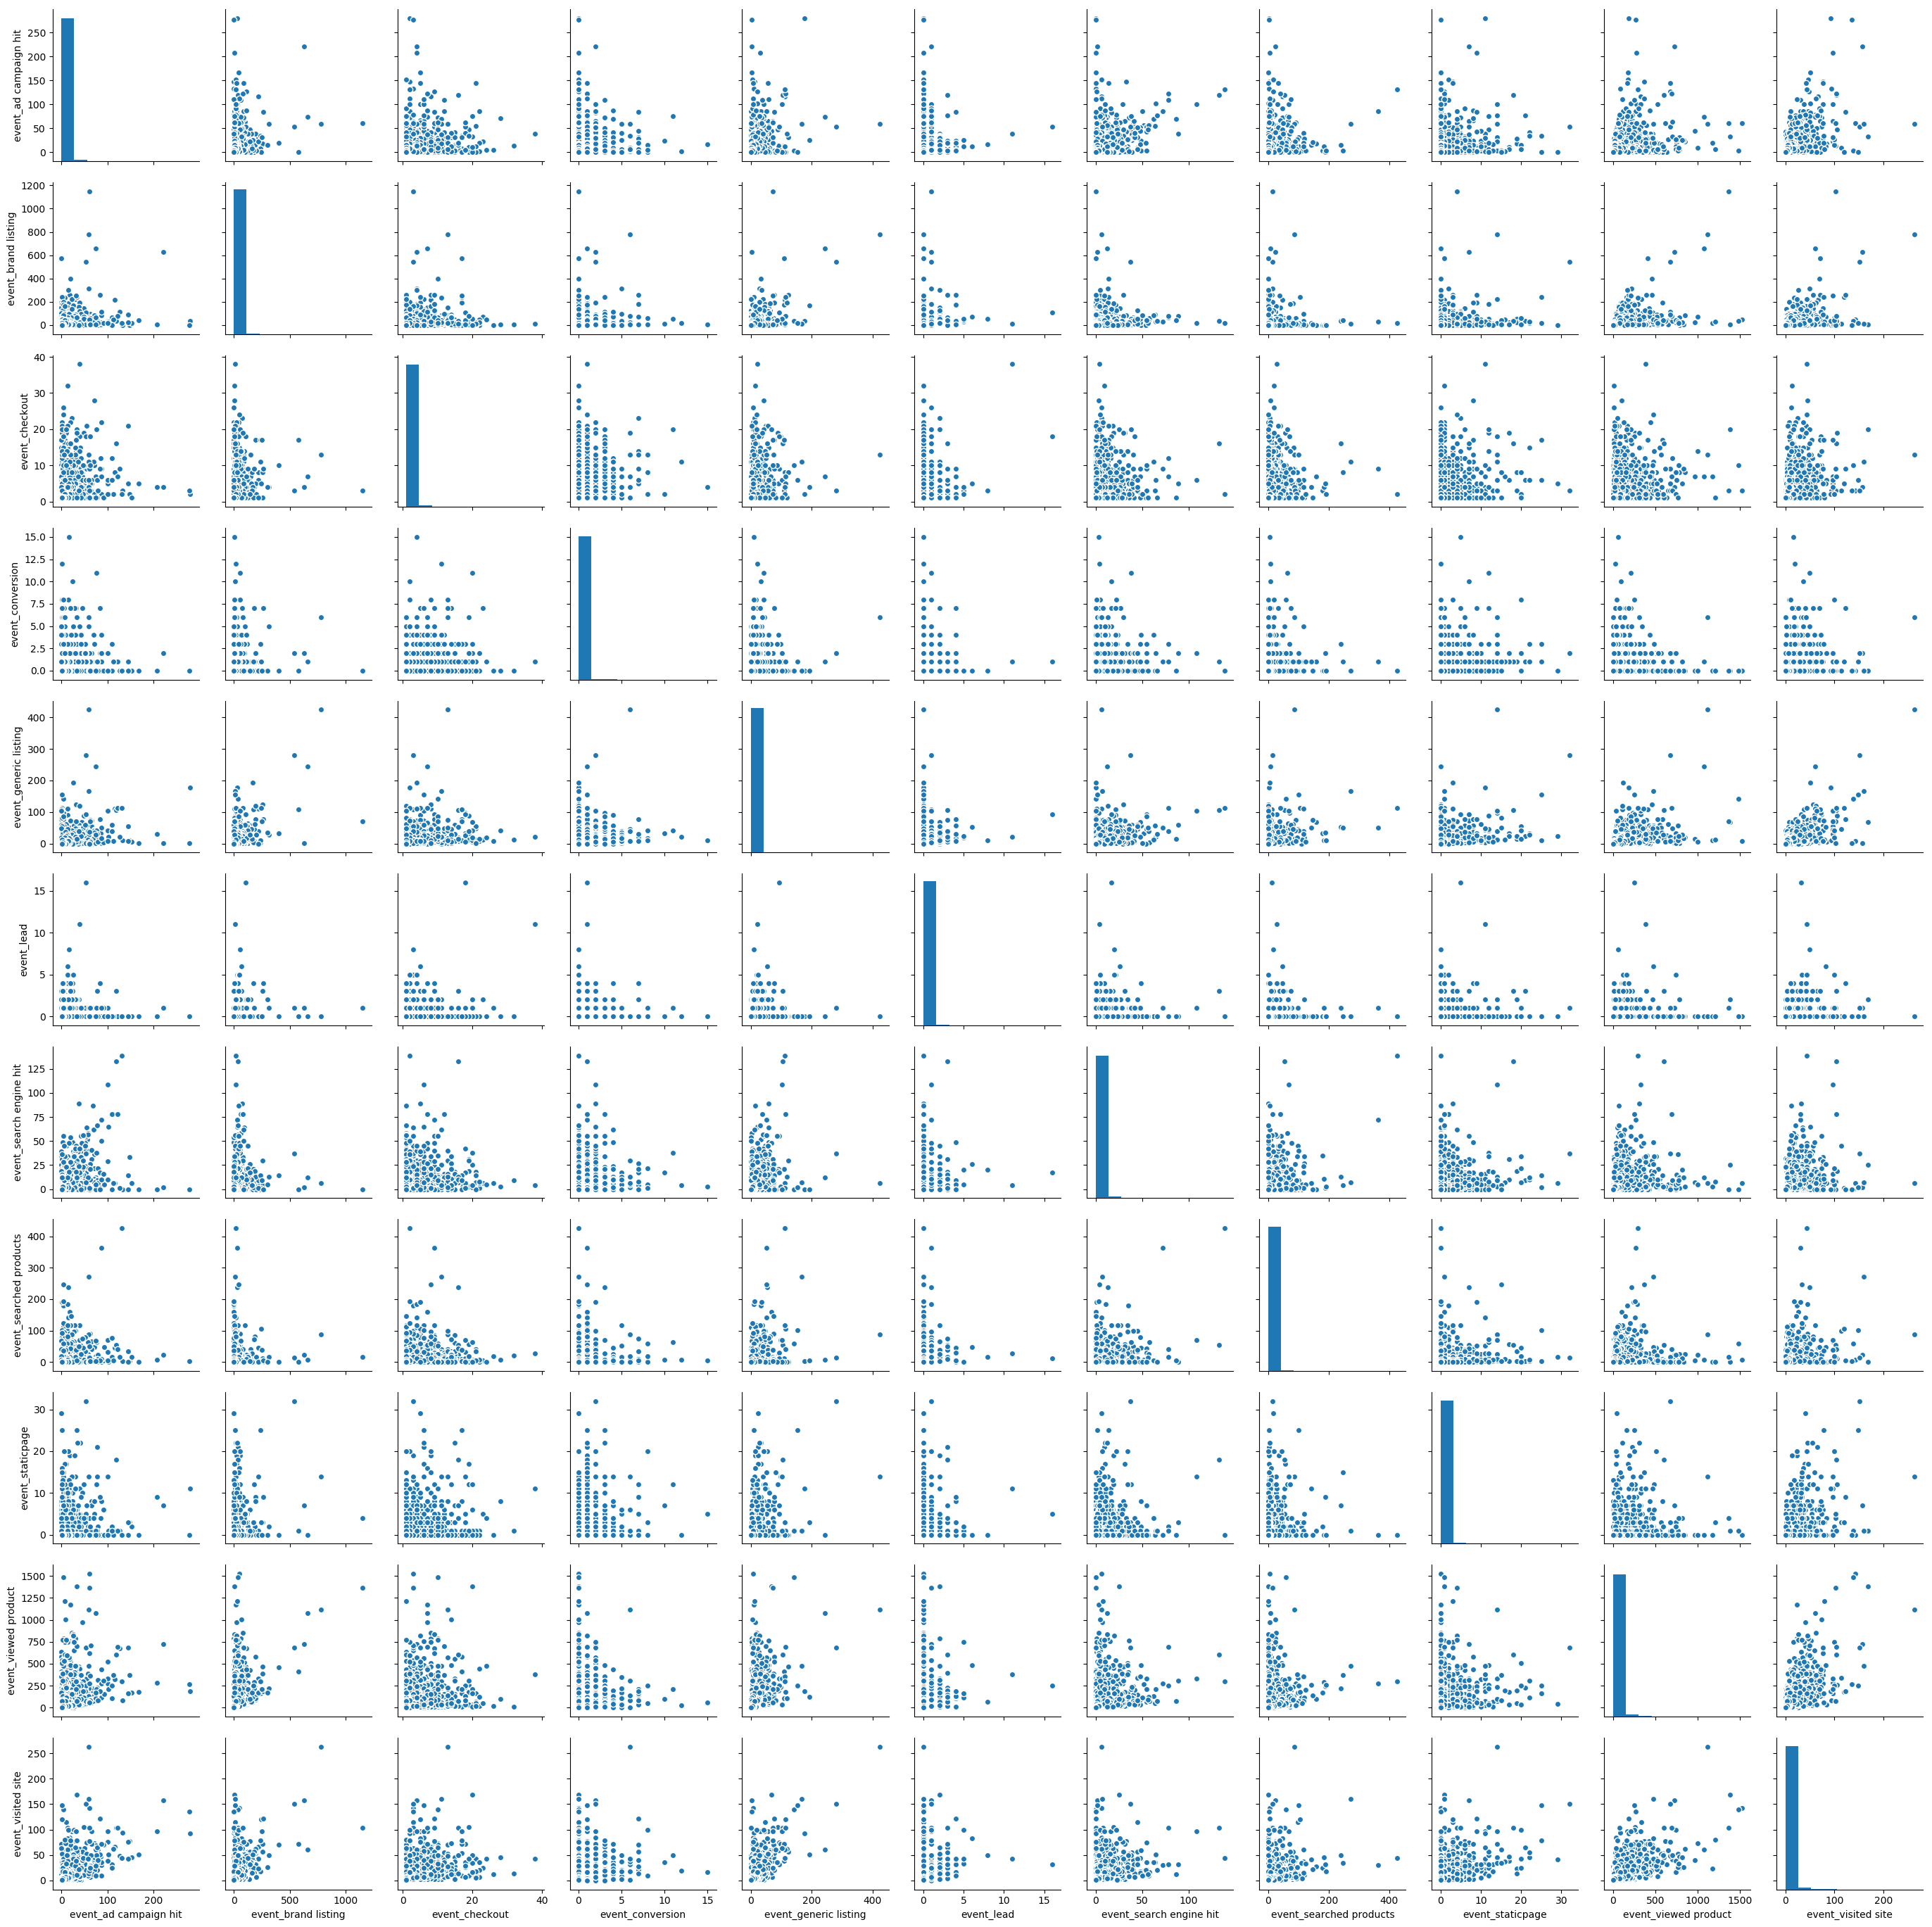

In [32]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.pairplot(graph, kind="scatter")

# Bueno.... que decir no???

### Event lead molesta, no aporta nada y son pocos
### Idem event convertion
### los saco y vuelvo a graficar

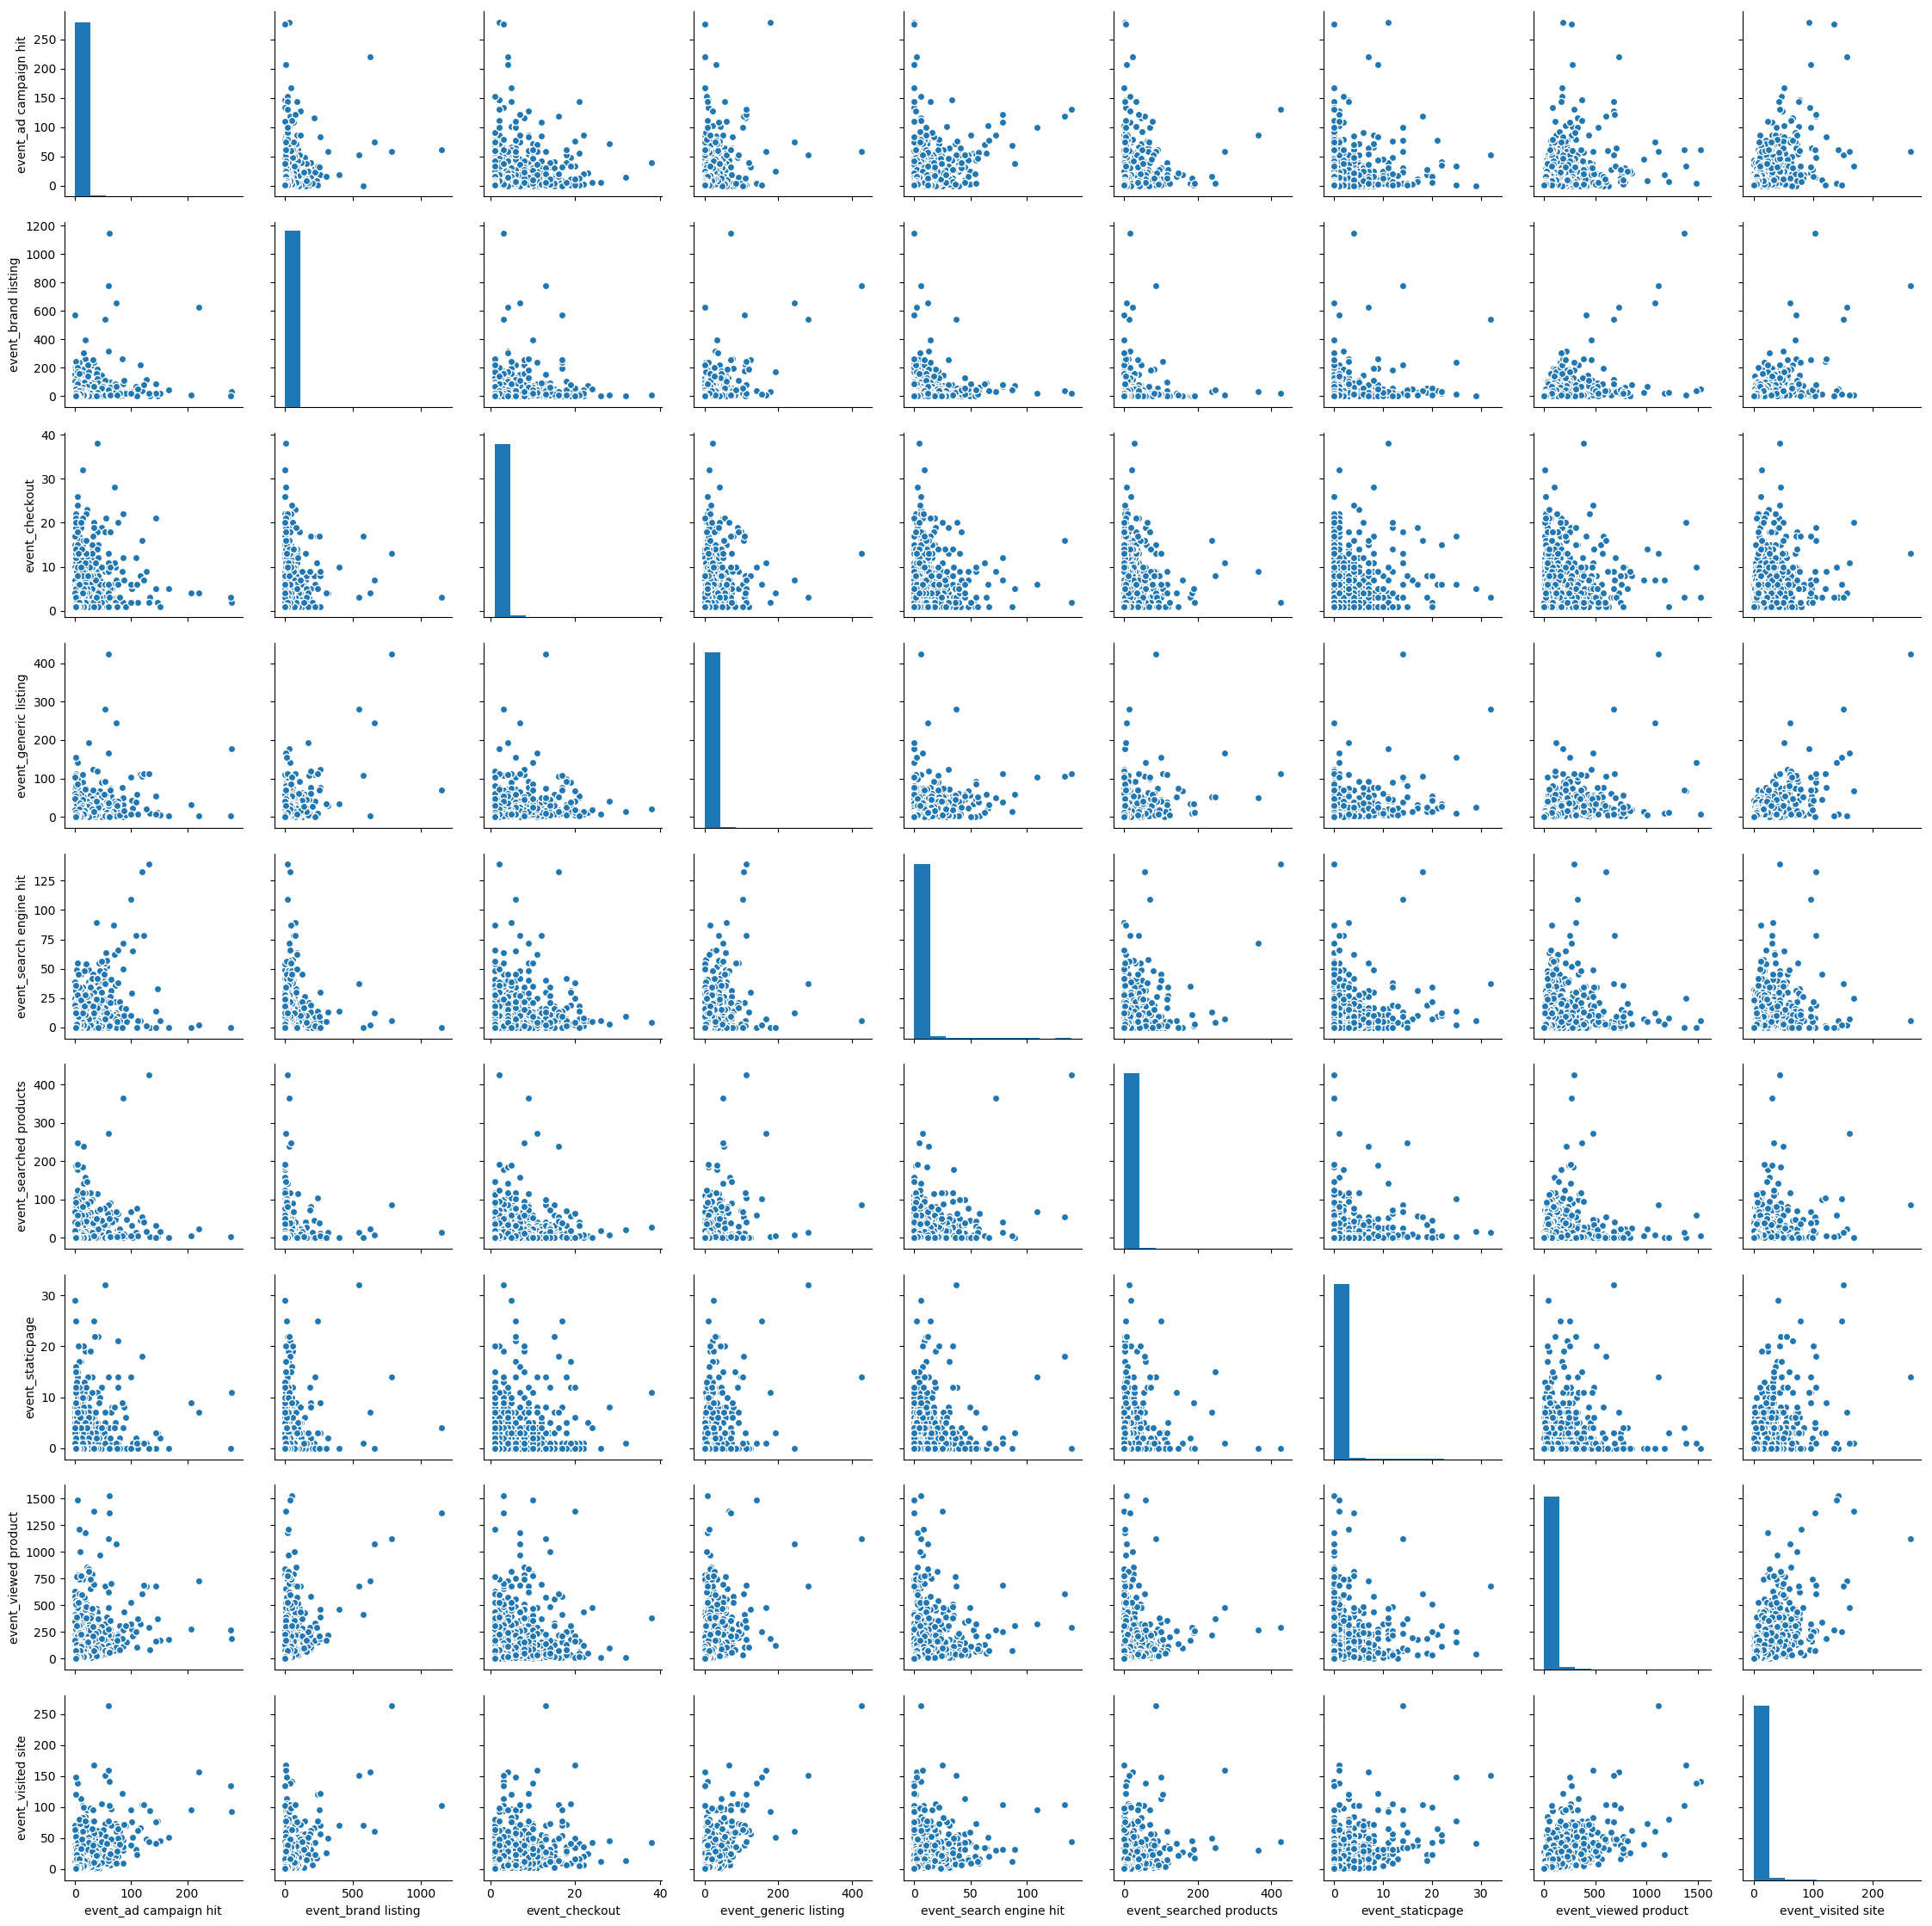

In [34]:
graph.drop(['event_lead','event_conversion'],inplace=True,axis=1)
plt.figure(figsize=(30,30))
sns.pairplot(graph, kind="scatter")